In [4]:
library('SimDesign')

#### 1. Generate samples from the following distribution

$
Y_i \sim N(\boldsymbol{\mu}, \boldsymbol{\Sigma}), \quad i=1,...,n
$

where

$
Y_i \in \mathbb{R}^p
$


In [6]:
mean_vec = c(0.05, -0.05, 0.03, 0.01, -0.1) # px1
cov_matrix = rbind(c(1,-0.6,0.6,0.6,-0.6),
                   c(-0.6,1,-0.6,-0.6,0.6),
                   c(0.6,-0.6,1,0.6,-0.6),
                   c(0.6,-0.6,0.6,1,-0.6),
                   c(-0.6,0.6,-0.6,-0.6,1))

Y = rmvnorm(100, mean=mean_vec, sigma=cov_matrix) 

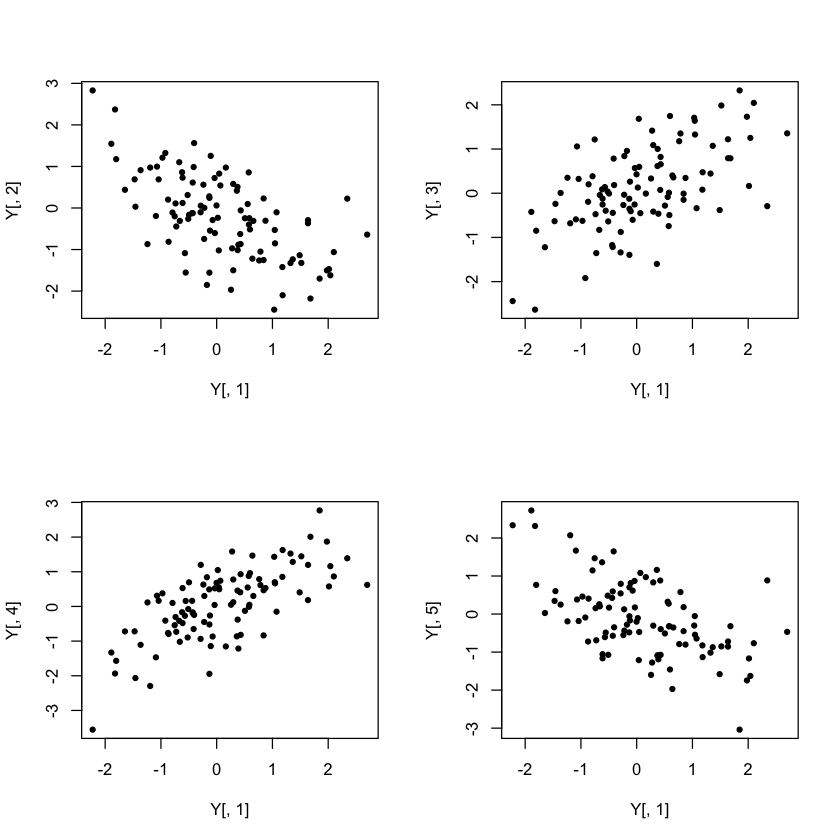

In [16]:
par(mfrow=c(2,2))
plot(x=Y[,1], y=Y[,2], pch=20) 
plot(x=Y[,1], y=Y[,3], pch=20) 
plot(x=Y[,1], y=Y[,4], pch=20) 
plot(x=Y[,1], y=Y[,5], pch=20) 

#### 2. Apply the Spectral Decomposition to the covariance matrix $\boldsymbol{\Sigma}$

$
\boldsymbol{\Sigma} = VDV^{-1}
$

where $V$ is a $p$x$p$ (orthonormal) matrix of eigenvectors of $\boldsymbol{\Sigma}$ and $D$ is a $p$x$p$ diagonal matrix of the eigenvalues of $\boldsymbol{\Sigma}$.

In [35]:
eigen = eigen(cov_matrix)
eigen_val = eigen$values
eigen_vec = eigen$vectors

V = eigen_vec
D = diag(eigen_val)

cov_matrix_spectral_decomp = V %*% D %*% solve(V)

In [31]:
cov_matrix

1.0,-0.6,0.6,0.6,-0.6
-0.6,1.0,-0.6,-0.6,0.6
0.6,-0.6,1.0,0.6,-0.6
0.6,-0.6,0.6,1.0,-0.6
-0.6,0.6,-0.6,-0.6,1.0


In [32]:
cov_matrix_spectral_decomp

1.0,-0.6,0.6,0.6,-0.6
-0.6,1.0,-0.6,-0.6,0.6
0.6,-0.6,1.0,0.6,-0.6
0.6,-0.6,0.6,1.0,-0.6
-0.6,0.6,-0.6,-0.6,1.0


#### 3. Apply the Singular Value Decomposition to the data matrix $Y$

$
Y = UDV^{'}
$

where 

In [38]:
eigen = eigen(t(Y) %*% Y)
eigen_val = eigen$values
eigen_vec = eigen$vectors

In [34]:
svd(Y)

-0.035909780,-0.131838548,-0.241444730,-0.1464582812,-0.043356901
-0.009129980,0.112014530,0.002448023,0.0510252935,-0.009846823
0.017298568,-0.082221013,-0.019486836,0.1627058682,0.039041305
-0.043221051,0.055178556,-0.019391596,0.0130066755,-0.054539554
0.090275310,0.057763852,-0.153781304,-0.1033133790,-0.171991918
0.140881490,-0.145332843,0.087898609,-0.1119774732,0.228480332
0.005174425,-0.013745696,-0.020758707,0.0283970733,-0.157039265
0.104967105,0.155574044,0.160536159,-0.0192185312,0.099789155
0.132118294,-0.003769134,-0.108196886,0.1083108383,-0.099151849
0.021545821,0.063002327,0.066116985,-0.0101948726,0.068083157
-0.094795427,0.058735096,-0.065251758,0.0681667827,-0.056748616
